In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus

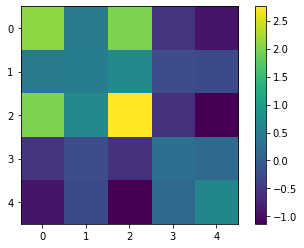

In [2]:
ndim = 5
nwalkers = 2*ndim
nsteps= 1000

C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

start = np.random.rand(ndim)

In [3]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov])
sampler.run(start, nsteps)

100%|██████████| 1000/1000 [00:00<00:00, 2435.92it/s]


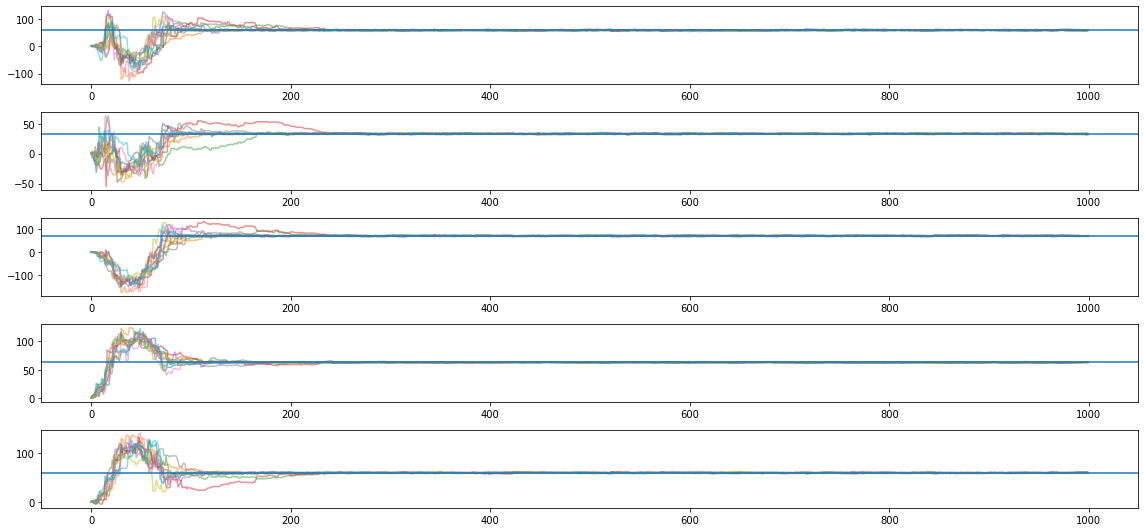

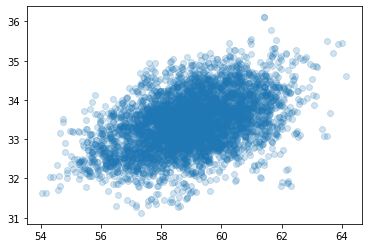

MCMC mean: [58.99286597 33.41155889 71.38614153 63.07726596 59.4680489 ]
TRUE mean: [58.85159583 33.30555687 71.18191078 63.16832385 59.56791934]
MCMC std: [1.51440138 0.69756539 1.71180041 0.57054826 0.79438898]
TRUE std: [1.44597646 0.71918836 1.65959838 0.53325294 0.80533395]
act: 10.993073459903389
ESS: 909.66371110631
ESS/LE: 0.02523829068352551


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(np.shape(sampler.chain)[1]),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten()
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)